In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
energydata = pd.DataFrame.from_csv('../data/energydata_complete.csv', index_col=None, encoding="utf-8")
energydata.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [4]:
energydata.tail(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19733,2016-05-27 17:50:00,420,10,25.5,46.99,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.5,46.60,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


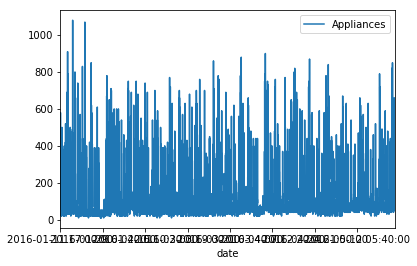

In [5]:
energydata.plot(x="date", y="Appliances")

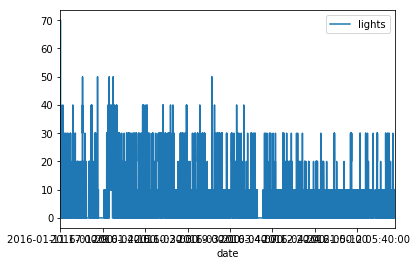

In [6]:
energydata.plot(x="date", y="lights")

In [8]:
comenergy = energydata[["date","Appliances","lights"]] #sub table with comsumed energy

In [21]:
comenergy["cumApp"] = comenergy.Appliances.cumsum()
comenergy["cumlights"] = comenergy.lights.cumsum()

/Users/josearturocelisgil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/josearturocelisgil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


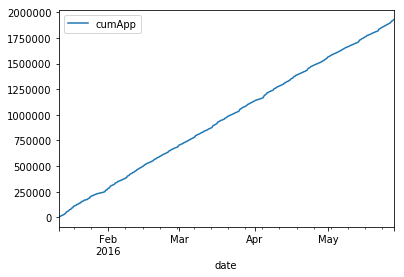

In [53]:
comenergy.plot(x="date",y="cumApp")

In [37]:
comenergy["date"] = pd.to_datetime(comenergy.date)

/Users/josearturocelisgil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


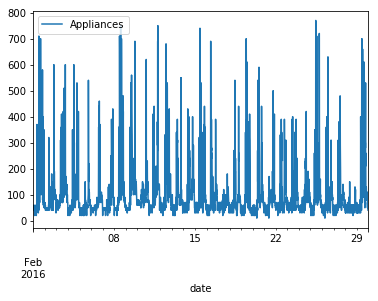

In [51]:
comenergy[comenergy.date.dt.month == 2].plot(x="date",y="Appliances")

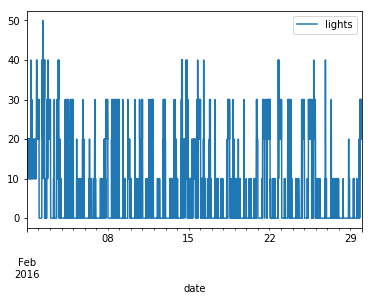

In [52]:
comenergy[comenergy.date.dt.month == 2].plot(x="date",y="lights")

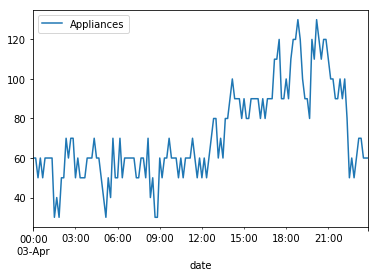

In [65]:
comenergy[(comenergy.date.dt.month == 4) & (comenergy.date.dt.day == 3)].plot(x="date",y="Appliances")

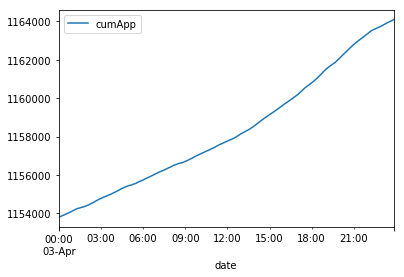

In [64]:
comenergy[(comenergy.date.dt.month == 4) & (comenergy.date.dt.day == 3)].plot(x="date",y="cumApp")